# Installation

In [1]:

!pip install transformers datasets evaluate
!pip install seqeval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=7a5ef527f6266ed5bdec9312b2b3ec9996346695e0ab49b54b5878e671b36ea0
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval


# Importing the required Libraries

In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [3]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import re
import string
import evaluate
import time
from numpy import random
import gensim.downloader as api
from PIL import Image
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Dense,Flatten,InputLayer,BatchNormalization,Dropout,Input,LayerNormalization
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from google.colab import files
from datasets import load_dataset
from transformers import (BertTokenizerFast,TFBertTokenizer,BertTokenizer,RobertaTokenizerFast,DataCollatorForTokenClassification,
                          DataCollatorWithPadding,TFRobertaForSequenceClassification,TFBertForSequenceClassification,
                          TFBertModel,create_optimizer,TFRobertaForTokenClassification,TFAutoModelForTokenClassification,)


In [4]:
BATCH_SIZE=16
NUM_EPOCHS=3

# Data Preperation

In [5]:
dataset = load_dataset("conll2003")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

conll2003.py:   0%|          | 0.00/9.57k [00:00<?, ?B/s]

The repository for conll2003 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/conll2003.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] print(inputs.word_ids()) print(dataset['train'][20]['ner_tags'])
The repository for conll2003 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/conll2003.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [6]:
dataset


DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

In [7]:
dataset['train'][20]


{'id': '20',
 'tokens': ['Rare',
  'Hendrix',
  'song',
  'draft',
  'sells',
  'for',
  'almost',
  '$',
  '17,000',
  '.'],
 'pos_tags': [22, 22, 21, 21, 42, 15, 30, 3, 11, 7],
 'chunk_tags': [11, 12, 12, 12, 21, 13, 11, 12, 12, 0],
 'ner_tags': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]}

In [8]:
model_id="roberta-base"
tokenizer=RobertaTokenizerFast.from_pretrained(model_id,add_prefix_space=True)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [9]:
'Rare Hendrix song draft sells for almost $ 17,000.'


'Rare Hendrix song draft sells for almost $ 17,000.'

In [10]:

inputs = tokenizer(dataset["train"][20]["tokens"], is_split_into_words=True,)
inputs.tokens()

['<s>',
 'ĠRare',
 'ĠHend',
 'rix',
 'Ġsong',
 'Ġdraft',
 'Ġsells',
 'Ġfor',
 'Ġalmost',
 'Ġ$',
 'Ġ17',
 ',',
 '000',
 'Ġ.',
 '</s>']

In [11]:
print(dataset['train'][20])


{'id': '20', 'tokens': ['Rare', 'Hendrix', 'song', 'draft', 'sells', 'for', 'almost', '$', '17,000', '.'], 'pos_tags': [22, 22, 21, 21, 42, 15, 30, 3, 11, 7], 'chunk_tags': [11, 12, 12, 12, 21, 13, 11, 12, 12, 0], 'ner_tags': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]}


In [12]:
print(inputs.word_ids())
print(dataset['train'][20]['ner_tags'])

[None, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 9, None]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:

def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            # Start of a new word!
            current_word = word_id
            label = -100 if word_id is None else labels[word_id]
            new_labels.append(label)
        elif word_id is None:
            # Special token
            new_labels.append(-100)
        else:
            # Same word as previous token
            label = labels[word_id]
            # If the label is B-XXX we change it to I-XXX
            if label % 2 == 1:
                label += 1
            new_labels.append(label)

    return new_labels

In [14]:

labels = dataset["train"][20]["ner_tags"]
word_ids = inputs.word_ids()
print(labels)
print(align_labels_with_tokens(labels, word_ids))

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[-100, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100]


In [15]:
def tokenizer_function(dataset):
  out=tokenizer(dataset["tokens"],truncation=True,is_split_into_words=True,)
  out['labels']=align_labels_with_tokens(dataset["ner_tags"],out.word_ids())
  return out

In [16]:
tokenized_dataset=dataset.map(tokenizer_function,remove_columns=['id','tokens','pos_tags','chunk_tags','ner_tags',])


Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [17]:
tokenized_dataset


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 3453
    })
})

In [18]:
tokenized_dataset['train'][20]


{'input_ids': [0,
  28751,
  16544,
  15072,
  2214,
  2479,
  7683,
  13,
  818,
  68,
  601,
  6,
  151,
  479,
  2],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'labels': [-100, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100]}

In [19]:

data_collator = DataCollatorForTokenClassification(
    tokenizer=tokenizer, return_tensors="tf"
)


In [20]:
tf_train_dataset = tokenized_dataset["train"].to_tf_dataset(
    collate_fn=data_collator,
    shuffle=True,
    batch_size=BATCH_SIZE,
)


In [21]:
tf_val_dataset = tokenized_dataset["validation"].to_tf_dataset(
    collate_fn=data_collator,
    shuffle=False,
    batch_size=BATCH_SIZE,
)

In [22]:
for i in tf_train_dataset.take(1):
  print(i)

{'input_ids': <tf.Tensor: shape=(16, 60), dtype=int64, numpy=
array([[    0, 34081, 14615,  7815,    36,  6171,  4839,  1954,     4,
         4837,  5896, 11456,    36,   798,  4839,     2,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1],
       [    0,  1083,   503,  2156,  5609,     7,   847,   812,  2524,
         2156,    40,  7581,  3229,  1797,     7,   847,  2003,  1334,
         2656,    11,  1093,   721,     7,    10,  3527,  2156,    10,
        10102,   781,    26,    15,   273,   479,     2,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,

# Modeling


# Based on TFRobertaForSequenceClassification


In [23]:
model=TFRobertaForTokenClassification.from_pretrained(
    model_id,
    num_labels=9,
)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForTokenClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForTokenClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForTokenClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
model.summary()

Model: "tf_roberta_for_token_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFRobertaMainLaye  multiple                  124055040 
 r)                                                              
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  6921      
                                                                 
Total params: 124061961 (473.26 MB)
Trainable params: 124061961 (473.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training


In [25]:

batches_per_epoch = len(tokenized_dataset["train"]) // BATCH_SIZE
total_train_steps = int(batches_per_epoch*NUM_EPOCHS)

In [26]:
optimizer, schedule = create_optimizer(init_lr=2e-5,num_warmup_steps=0, num_train_steps=total_train_steps,)


In [28]:

model.compile(optimizer=optimizer,
                  metrics=["accuracy"])


In [29]:

history=model.fit(
    tf_train_dataset,
    validation_data=tf_val_dataset,
    epochs=NUM_EPOCHS,)

Epoch 1/3
878/878 [==============================] - 227s 196ms/step - loss: 0.1594 - accuracy: 0.3739 - val_loss: 0.0564 - val_accuracy: 0.4377
Epoch 2/3
878/878 [==============================] - 163s 185ms/step - loss: 0.0462 - accuracy: 0.3842 - val_loss: 0.0480 - val_accuracy: 0.4386
Epoch 3/3
878/878 [==============================] - 170s 194ms/step - loss: 0.0300 - accuracy: 0.3861 - val_loss: 0.0409 - val_accuracy: 0.4398


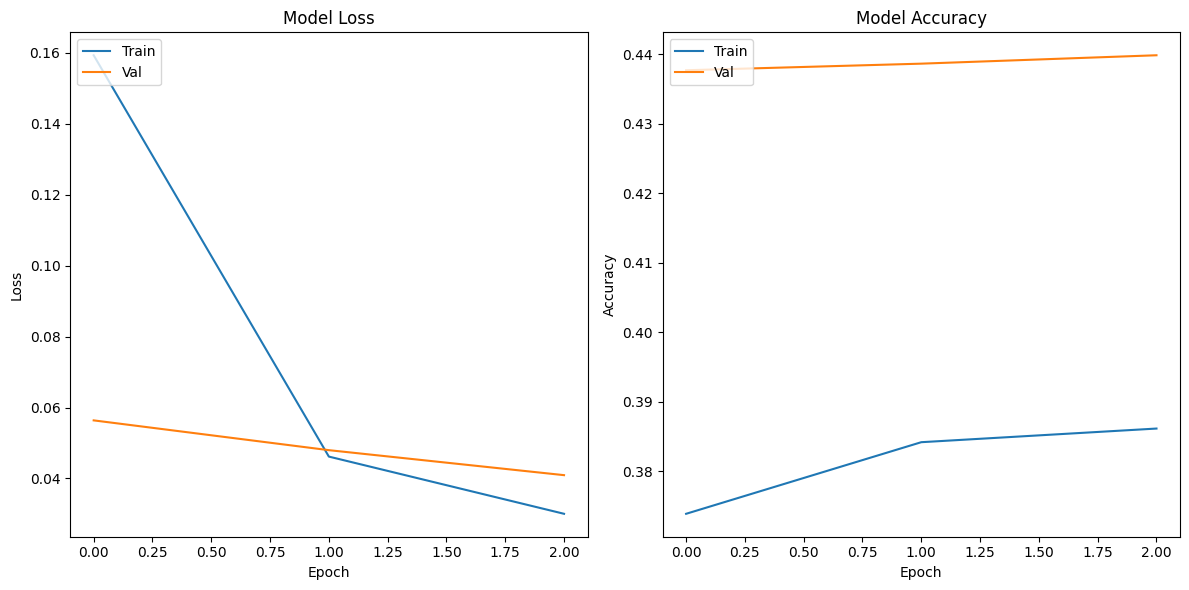

In [30]:
# Plot Loss and Accuracy curves
plt.figure(figsize=(12, 6))

# Plot the loss curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()
plt.show()


# Evaluation

In [31]:
metric=evaluate.load("seqeval")



In [32]:

ind_to_label={0:'O', 1:'B-PER',2:'I-PER',3:'B-ORG',4:'I-ORG',5:'B-LOC',6:'I-LOC',7:'B-MISC',8:'I-MISC'}
all_predictions = []
all_labels = []

In [33]:
for batch in tf_val_dataset:
  logits = model.predict(batch)["logits"]
  labels = batch["labels"].numpy()
  predictions = tf.argmax(logits, axis=-1).numpy()
  #print(labels)
  #print(predictions)
  for prediction, label in zip(predictions, labels):
    for predicted_idx, label_idx in zip(prediction, label):
      if label_idx == -100:
          continue
      all_predictions.append(ind_to_label[predicted_idx])
      all_labels.append(ind_to_label[label_idx])

1/1 [==============================] - 0s 62ms/step


In [34]:
metric.compute(predictions=[all_predictions], references=[all_labels])


{'LOC': {'precision': 0.9629828326180258,
  'recall': 0.9771366358192706,
  'f1': 0.9700081059173197,
  'number': 1837},
 'MISC': {'precision': 0.8675078864353313,
  'recall': 0.8947939262472885,
  'f1': 0.8809396689802456,
  'number': 922},
 'ORG': {'precision': 0.9177679882525698,
  'recall': 0.9321401938851603,
  'f1': 0.9248982611912689,
  'number': 1341},
 'PER': {'precision': 0.9694206008583691,
  'recall': 0.9809989142236699,
  'f1': 0.9751753912574205,
  'number': 1842},
 'overall_precision': 0.9397450753186558,
 'overall_recall': 0.9554022214742511,
 'overall_f1': 0.94750897104231,
 'overall_accuracy': 0.9885244392623731}

Confusion Matrix:
 [[ 1797    11    17     6     2     1     0     1     2]
 [   17   843    16     6     0     4     0     0    36]
 [   22    21  1269    12     0     0     6     1    10]
 [    6     6     9  1815     0     0     0     3     3]
 [    2     0     0     0  1741    13    30    12     3]
 [    3    13     2     0    22   806    32     8    49]
 [    1     0     7     0    31    25  2203    20    32]
 [    0     0     1     5     5     8    25  4164    11]
 [    8    30    16     5     8    62    29    12 49796]]


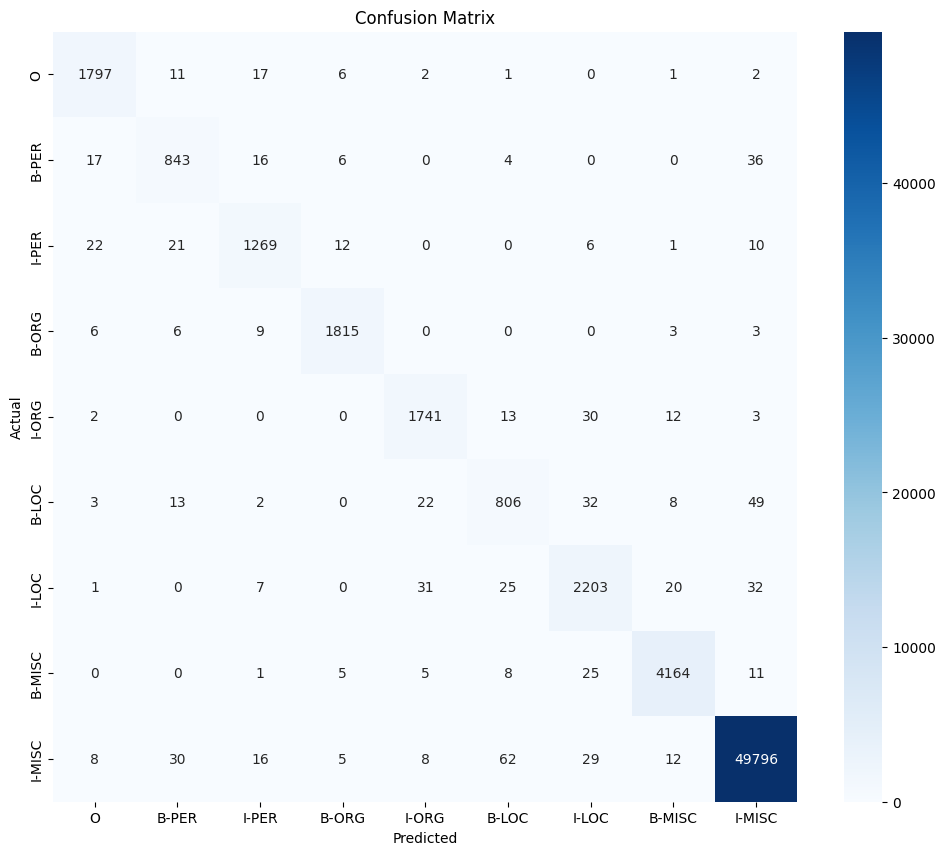

Normalized Confusion Matrix:
 [[9.78225367e-01 5.98802395e-03 9.25421884e-03 3.26619488e-03
  1.08873163e-03 5.44365814e-04 0.00000000e+00 5.44365814e-04
  1.08873163e-03]
 [1.84381779e-02 9.14316703e-01 1.73535792e-02 6.50759219e-03
  0.00000000e+00 4.33839479e-03 0.00000000e+00 0.00000000e+00
  3.90455531e-02]
 [1.64056674e-02 1.56599553e-02 9.46308725e-01 8.94854586e-03
  0.00000000e+00 0.00000000e+00 4.47427293e-03 7.45712155e-04
  7.45712155e-03]
 [3.25732899e-03 3.25732899e-03 4.88599349e-03 9.85342020e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.62866450e-03
  1.62866450e-03]
 [1.11049417e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.66685175e-01 7.21821210e-03 1.66574125e-02 6.66296502e-03
  1.66574125e-03]
 [3.20855615e-03 1.39037433e-02 2.13903743e-03 0.00000000e+00
  2.35294118e-02 8.62032086e-01 3.42245989e-02 8.55614973e-03
  5.24064171e-02]
 [4.31220354e-04 0.00000000e+00 3.01854248e-03 0.00000000e+00
  1.33678310e-02 1.07805088e-02 9.49978439e-01 8.6244070

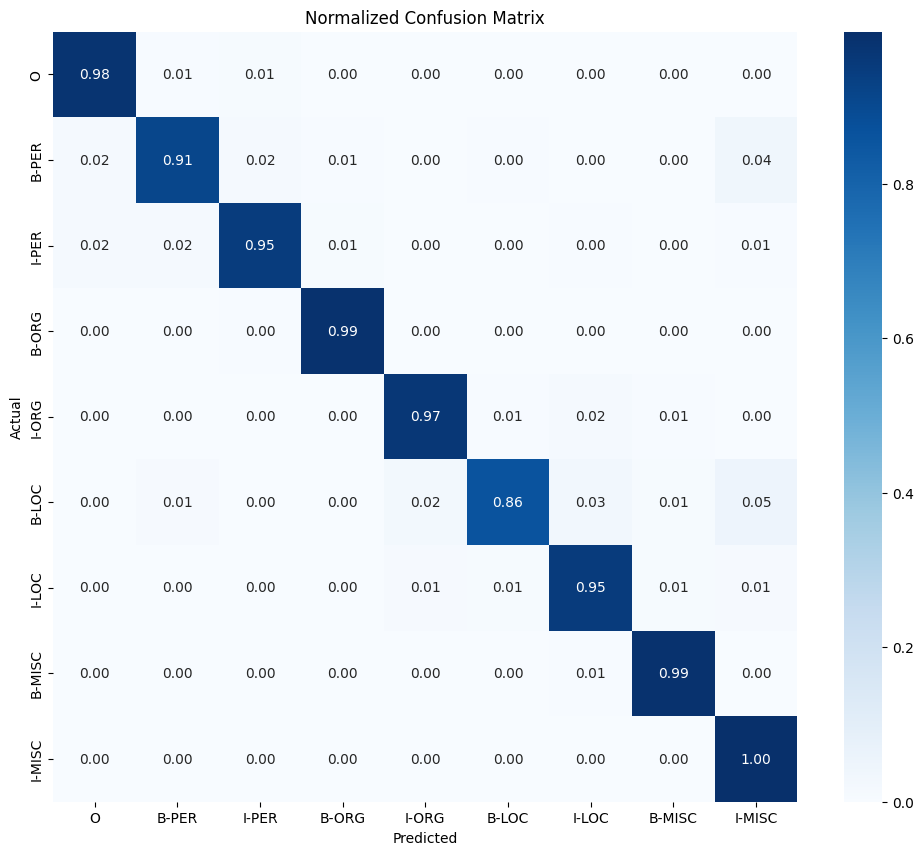

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming all_predictions and all_labels are provided
# all_predictions = [list of predicted labels]
# all_labels = [list of true labels]

# Mapping of label indices to their corresponding entity labels
label_map = {
    0: 'O',
    1: 'B-PER',
    2: 'I-PER',
    3: 'B-ORG',
    4: 'I-ORG',
    5: 'B-LOC',
    6: 'I-LOC',
    7: 'B-MISC',
    8: 'I-MISC'
}

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[label_map[i] for i in range(9)], yticklabels=[label_map[i] for i in range(9)])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the normalized confusion matrix
print("Normalized Confusion Matrix:\n", cm_normalized)

# Plot the normalized confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=[label_map[i] for i in range(9)], yticklabels=[label_map[i] for i in range(9)])
plt.title('Normalized Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Testing


In [39]:
inputs=tokenizer(["Wake Up JoeMarshal, you just got a call from UNESCO for a trip to India"], padding=True,return_tensors="tf")


In [40]:

print(inputs.tokens())
print(inputs.word_ids())
print(inputs['input_ids'])

['<s>', 'ĠWake', 'ĠUp', 'ĠJoe', 'Marsh', 'al', ',', 'Ġyou', 'Ġjust', 'Ġgot', 'Ġa', 'Ġcall', 'Ġfrom', 'ĠUNESCO', 'Ġfor', 'Ġa', 'Ġtrip', 'Ġto', 'ĠIndia', '</s>']
[None, 0, 1, 2, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None]
tf.Tensor(
[[    0 11601  3105  2101 40825   337     6    47    95   300    10   486
     31 26688    13    10  1805     7   666     2]], shape=(1, 20), dtype=int32)


In [41]:

logits = model(**inputs).logits
print(logits.shape)
print(tf.argmax(logits,axis=-1))

(1, 20, 9)
tf.Tensor([[0 0 0 1 2 2 0 0 0 0 0 0 0 3 0 0 0 0 5 0]], shape=(1, 20), dtype=int64)


In [42]:

ind_to_label={0:'O', 1:'B-PER',2:'I-PER',3:'B-ORG',4:'I-ORG',5:'B-LOC',6:'I-LOC',7:'B-MISC',8:'I-MISC'}
out_str=""
current_index=0

In [44]:
for i in range(1,len(inputs.tokens())-1):
  if tf.argmax(logits,axis=-1)[0][i]!=0:
    out_str+=" "+str(inputs.tokens()[i])+"--->"+str(ind_to_label[tf.argmax(logits,axis=-1).numpy()[0][i]])
  else:
    out_str+=" "+str(inputs.tokens()[i])

In [45]:
print(out_str.replace("Ġ",""))


 Wake Up Joe--->B-PER Marsh--->I-PER al--->I-PER , you just got a call from UNESCO--->B-ORG for a trip to India--->B-LOC
